Loading model for application

Load libraries

In [29]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
import os

Load trained model

In [30]:
model4_Final = load_model('model') 

1/1 [==============================] - 1s 1s/step


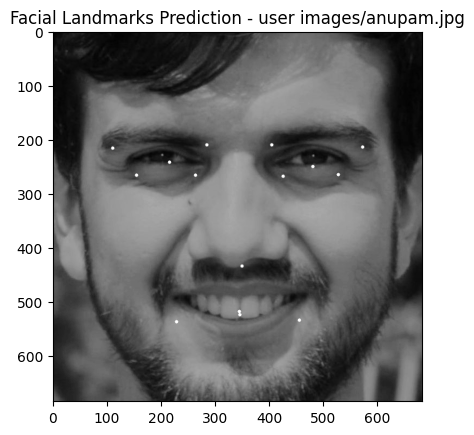

1/1 [==============================] - 0s 331ms/step


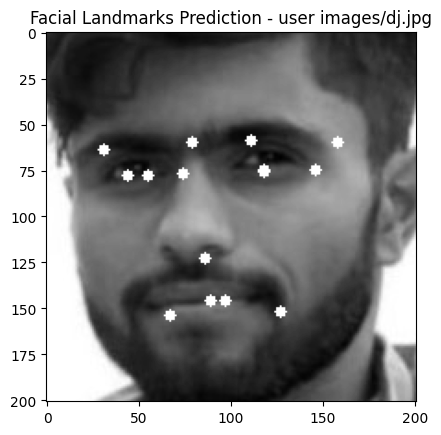

1/1 [==============================] - 0s 312ms/step


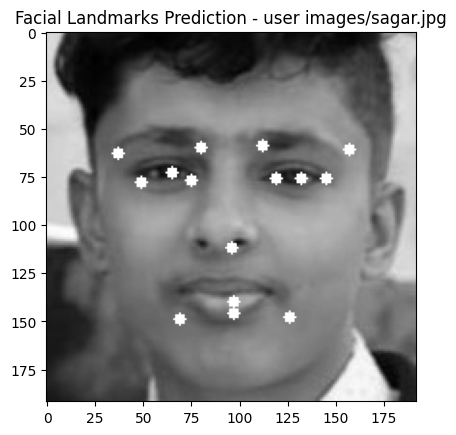

1/1 [==============================] - 0s 207ms/step


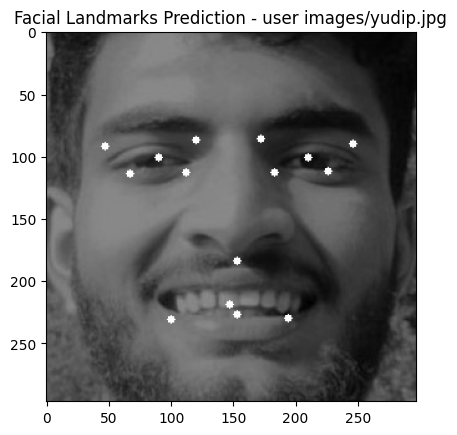

1/1 [==============================] - 0s 233ms/step


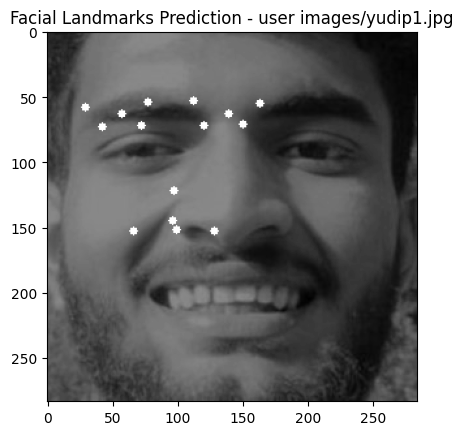

In [31]:


# Directory path
directory_path = 'user images/'

# Get a list of all files in the directory
all_files = os.listdir(directory_path)

# Create a list of full paths for each file in the directory
image_paths = [os.path.join(directory_path, file) for file in all_files] 

for image_path in image_paths:
    
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale

    # Resize the image to match the input size of your model (96x96)
    resized_image = cv2.resize(image, (96, 96))

    # Normalize the pixel values to be in the range [0, 1]
    normalized_image = resized_image / 255.0

    # Reshape the image to match the model's input shape
    input_image = normalized_image.reshape((1, 96, 96, 1))

    # Use the trained model to make predictions
    landmarks = model4_Final.predict(input_image)

    # Reshape the predicted landmarks to (15, 2) format (assuming 15 keypoints)
    landmarks = landmarks.reshape((15, 2))

    # Scale the landmarks back to the original image size
    scaled_landmarks = landmarks * np.array([image.shape[1] // 96, image.shape[0] // 96])

    # Draw the landmarks on the original image
    for landmark in scaled_landmarks:
        cv2.circle(image, tuple(map(int, landmark)), 3, (255, 0, 0), -1)  # Draw a circle at each landmark

    # Display the image with landmarks
    plt.imshow(image, cmap='gray')
    plt.title("Facial Landmarks Prediction - {}".format(image_path))
    plt.show()
